In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_mldata
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')



mnist = fetch_mldata('MNIST original')
X, y = mnist["data"], mnist["target"]

X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [3]:
#preparing dataset for a 5/non5 classificiations
y_train_5 = y_train == 5

from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier

sgd_clf = SGDClassifier(max_iter = 5, random_state=42)
sgd_clf.fit(X_train, y_train_5)

from sklearn.model_selection import cross_val_score, cross_val_predict
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring = "accuracy")

#making predctions on the training data as a 5 or not
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)


#-------------------------------- using complete dataset and not just 5/non5 -----------

sgd_scrs = cross_val_score(sgd_clf, X_train, y_train, cv = 3, scoring = "accuracy")
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train, cv=3)
print("(SGD non scaled)", sgd_scrs)

#using randomforestclassifier
forest_clf = RandomForestClassifier(random_state = 42)
frst_scrs = cross_val_score(forest_clf, X_train, y_train, cv = 3, scoring = "accuracy")
print("(Random Forest)", frst_scrs)


#using standard scalar
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
sgd_scrs_scaled = cross_val_score(sgd_clf, X_train_scaled, y_train, cv = 3, scoring = "accuracy")
print("(SGD scaled)", sgd_scrs_scaled)

(SGD non scaled) [0.86162767 0.87049352 0.85502825]
(Random Forest) [0.94081184 0.94149707 0.93879082]
(SGD scaled) [0.91096781 0.91159558 0.906636  ]


In [4]:
#automatically sgd makes onevsall classifier, if we want one vsone this is how you do it. 
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(max_iter=5, random_state=42))
ovo_clf.fit(X_train, y_train)
ovo_clf.predict([X_train[1]])
len(ovo_clf.estimators_)

45

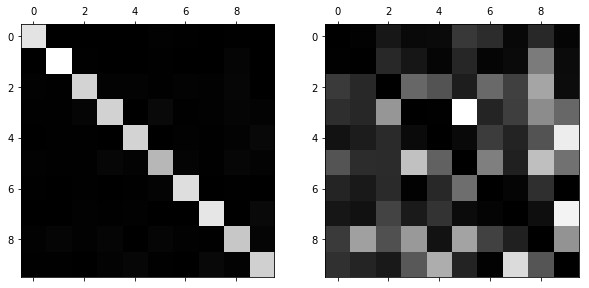

In [6]:
#illustration purposes
from sklearn.metrics import confusion_matrix
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums
np.fill_diagonal(norm_conf_mx, 0)

plt.subplots(figsize=(10,10))
a = plt.subplot(1,2,1) 
a.matshow(conf_mx, cmap=plt.cm.gray)
b = plt.subplot(1,2,2)
b.matshow(norm_conf_mx, cmap=plt.cm.gray)

number:  20


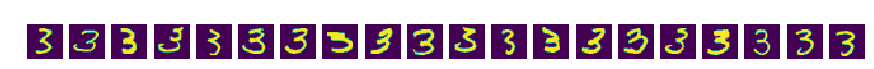

In [171]:
import math
def plot_digits(imagesets, images_per_row):
    images = [instance.reshape(28,28) for instance in imagesets]
    #print(images)
    num_image = len(images) 
    n_col = math.ceil(num_image/10)
    plt.subplots(figsize=(15,15))
    print("number: ", num_image)
    for i in range(num_image):
        a = plt.subplot(n_col, num_image ,i +1) 
        a.matshow(images[i])
        plt.axis('off')
    #print(imgmatrix)
    #ni = np.reshape(images, (-1, 28 * 3))
    #print(ni.shape)
    # plt.matshow(ni)
    #plt.matshow(imgmatrix)
#     print(images)
#     print(type(images))
#     print(len(images))

myar = np.array([np.arange(784), np.arange(784), np.arange(784), np.arange(784)])

cl_a, cl_b = 3, 5
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
# X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
# X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
# X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]
plot_digits(X_aa[:20], 5)

# plt.figure(figsize=(8,8))
# plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
# plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
# plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
# plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
# plt.show()

In [130]:
myar = [[np.arange(5)], [np.arange(5,10)], [np.arange(10,15)], [4, 5, 7,6 ,6]]
print(myar)

[[array([0, 1, 2, 3, 4])], [array([5, 6, 7, 8, 9])], [array([10, 11, 12, 13, 14])], [4, 5, 7, 6, 6]]


In [137]:
print(np.reshape(myar, (-1,4)))

[[list([array([0, 1, 2, 3, 4])]) list([array([5, 6, 7, 8, 9])])
  list([array([10, 11, 12, 13, 14])]) list([4, 5, 7, 6, 6])]]
